# Predicting FCGR 

In [92]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
pd.set_option('display.max_columns', None)

In [93]:
df = pd.read_csv('datasets/parameter.csv',encoding='latin1',skiprows=1)
dadn = pd.read_csv('datasets/dadn.csv')

# EDA + Preprocessing

In [94]:
df = df[df['dataset id']>=1847]

In [95]:
df.head()

,dataset id,title,authors,source of the publication,year of publication,institution,country and region,funding agency,DOI,types of fatigue data,method of extraction,name of the material,types of AM,AM machine,power \n(W),scan speed \n(mm/s),hatch space \n(?m),layer thickness \n(?m),preheat temperature \n(°C),direciton of specimen \n(°),AM environment,scan pattern,layer scan rotation \n(°),voltage \n(V),current \n(A),speed function,powder feed rate \n(g/s),wire feed rate \n(mm/s),types of feedstock,size of feedstock \n(?m),processing sequence and parameters,types of fatigue tests,fatigue temperature \n(°C),fatigue environment,load ratio,frequency \n(Hz),fatigue machine,fatigue standard,load control,specimens description,critical cross-section size of specimens\n(mm),stress concentration factor of specimens,Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score
1846,1847,Fatigue crack growth behaviour in Ti6Al4V allo...,"Borrego, Luis P.; Capela, Carlos; Costa, Jose ...",INTERNATIONAL JOURNAL OF FRACTURE,2020,Coimbra Polytech ISEC; Polytech Inst Leiria; U...,Portugal,European Commission; European Regional Develop...,10.1007/s10704-019-00417-2,dadn,color,Ti-6Al-4V,L-PBF,3D Systems ProX DMP 320,NaN,NaN,NaN,30,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,40,"HT 670 C, 5 hour; SURF machine; SURF polish",uniaxial,25,air,0.05,10,Instron ElectroPuls E10000,ASTM E647,load,C(T); with drawing,"36, 6",1.0,120.0,950.0,1144.0,NaN,0.771
1847,1848,Fatigue crack growth behaviour in Ti6Al4V allo...,"Borrego, Luis P.; Capela, Carlos; Costa, Jose ...",INTERNATIONAL JOURNAL OF FRACTURE,2020,Coimbra Polytech ISEC; Polytech Inst Leiria; U...,Portugal,European Commission; European Regional Develop...,10.1007/s10704-019-00417-2,dadn,color,Ti-6Al-4V,L-PBF,3D Systems ProX DMP 320,NaN,NaN,NaN,30,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,40,"HT 670 C, 5 hour; SURF machine; SURF polish",uniaxial,25,air,0.4,10,Instron ElectroPuls E10000,ASTM E647,load,C(T); with drawing,"36, 6",1.0,120.0,950.0,1144.0,NaN,0.771
1848,1849,Effect of Powder Recycling on Environment-Assi...,"Goto, Masahiro; Kim, Sangshik; Kim, Soyoung",METALLURGICAL AND MATERIALS TRANSACTIONS A-PHY...,2022,Gyeongsang Natl Univ; Oita Univ,Japan; South Korea,"Ministry of Commerce, Industry and Energy, Sou...",10.1007/s11661-021-06514-z,dadn,color and shape,IN718,L-PBF,EOS M290,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,NaN,"HT 980 C, 1 hour; HT 720 C, 8 hour; HT 620 C, ...",uniaxial,25,air,0.1,10,Instron 8801,NaN,load,C(T); with drawing,"50.8, 4",1.0,NaN,1183.0,1416.0,19.3,0.686
1849,1850,Effect of Powder Recycling on Environment-Assi...,"Goto, Masahiro; Kim, Sangshik; Kim, Soyoung",METALLURGICAL AND MATERIALS TRANSACTIONS A-PHY...,2022,Gyeongsang Natl Univ; Oita Univ,Japan; South Korea,"Ministry of Commerce, Industry and Energy, Sou...",10.1007/s11661-021-06514-z,dadn,color and shape,IN718,L-PBF,EOS M290,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,NaN,"HT 980 C, 1 hour; HT 720 C, 8 hour; HT 620 C, ...",uniaxial,25,"3.5% NaCl, 60 C, Ecorr, 0.1 Vsce",0.1,10,Instron 8801,NaN,load,C(T); with drawing,"50.8, 4",1.0,NaN,1164.0,1408.0,18.9,0.686
1850,1851,Effect of Powder Recycling on Environment-Assi...,"Goto, Masahiro; Kim, Sangshik; Kim, Soyoung",METALLURGICAL AND MATERIALS TRANSACTIONS A-PHY...,2022,Gyeongsang Natl Univ; Oita Univ,Japan; South Korea,"Ministry of Commerce, Industry and Energy, Sou...",10.1007/s11661-021-06514-z,dadn,color and shape,IN718,L-PBF,EOS M290,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,NaN,"HT 980 C, 1 hour; HT 720 C, 8 hour; HT 620 C, ...",uniaxial,25,air,0.1,10,Instron 8801,NaN,load,C(T); with drawing,"50.8, 4",1.0,NaN,1171.0,1379.0,18.6,0.686


In [96]:
df.shape

(614, 47)

In [97]:
dadn.head()

,dataset id,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,3.89,5.309000e-10
1,1847,12.65,3.641000e-08
2,1847,10.57,1.530000e-08
3,1847,20.58,1.933000e-07
4,1847,7.51,7.479000e-09


In [98]:
# Calculate mean stress intensity factor range and mean crack growth rate for each dataset ID
dadn = dadn.groupby('dataset id').agg({'stress intensity factor range\n?K (MPa*m^(1/2))': 'mean',
                                                  'crack growth rate \nda/dn (m/cycle)': 'mean'}).reset_index()


In [99]:
dadn.head()

,dataset id,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,13.680420,1.546808e-07
1,1848,9.211280,4.163001e-08
2,1849,29.208276,2.483508e-07
3,1850,27.604167,2.017373e-07
4,1851,25.745769,2.355489e-07


In [100]:
dadn.shape

(614, 3)

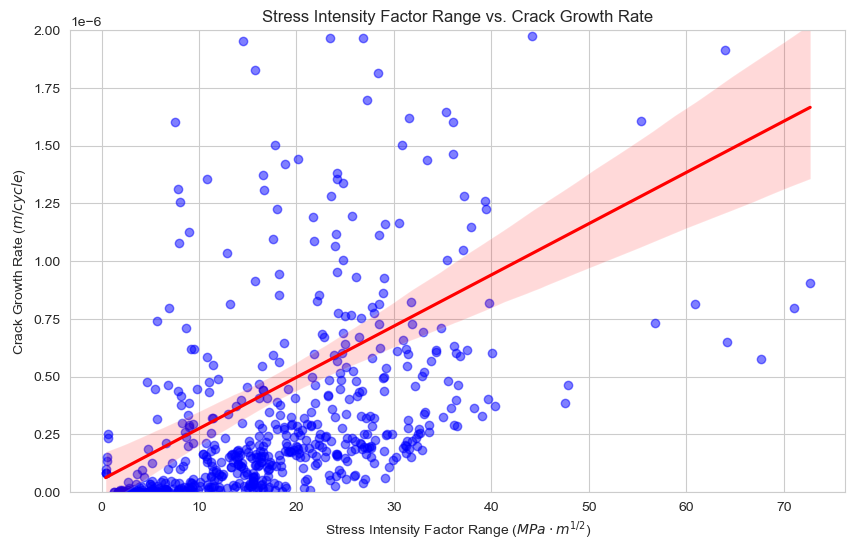

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged data

# Set the style of seaborn plot
sns.set_style("whitegrid")

# Create the plot with specified axis limits and labels
plt.figure(figsize=(10, 6))
sns.regplot(x='stress intensity factor range\n?K (MPa*m^(1/2))',
            y='crack growth rate \nda/dn (m/cycle)',
            data=dadn,
            scatter_kws={'color': 'blue', 'alpha': 0.5},
            line_kws={'color': 'red'},
            marker='o')  # Add markers to the scatter plot

# Set y-axis limits to 0-2e-6
plt.ylim(0, 2e-6)

# Title and labels with units and multipliers
plt.title('Stress Intensity Factor Range vs. Crack Growth Rate')
plt.xlabel('Stress Intensity Factor Range ($MPa \cdot m^{1/2}$)')
plt.ylabel('Crack Growth Rate ($m/cycle$)')

# Show grid
plt.grid(True)

# Show plot
plt.show()


## Observations and Analysis

### 1. Direct Relationship
The plotted graph shows a direct and positive relationship between stress intensity factor range ($K$) and crack growth rate ($da/dn$). As the stress intensity factor range increases, the crack growth rate also increases linearly.

**Justification:** This observation aligns with fundamental principles of fatigue crack growth behavior in materials. Higher stress intensity factor ranges lead to faster crack propagation rates due to increased driving forces acting on the crack tip.

**Mechanical Domain Validation:** This observation is consistent with Paris' law, which states that crack growth rate ($da/dN$) is proportional to the stress intensity factor range ($\Delta K$) raised to a power. The linear relationship observed in the graph validates this mechanical behavior.

### 2. Limited Crack Growth at Low Stress Intensity
At lower stress intensity factor ranges, the crack growth rate remains relatively low, indicating that under lower stress levels, the material experiences slower crack propagation rates.

**Justification:** Lower stress intensity levels result in comparatively lower driving forces for crack propagation, leading to limited crack growth rates. The material exhibits better resistance to crack growth under such conditions.

**Mechanical Domain Validation:** This aligns with fatigue behavior theories that suggest a threshold stress intensity factor below which crack growth rates are significantly reduced. This phenomenon is associated with crack closure effects and material toughness properties.

### 3. Linear Regression Fit
The regression line accurately represents the trend of increasing crack growth rates with increasing stress intensity factor ranges, providing a mathematical model to predict crack growth behavior based on stress levels.

**Justification:** The linear regression fit approximates the relationship between stress intensity factor range and crack growth rate with a linear equation, simplifying predictive modeling and fatigue analysis.

**Mechanical Domain Validation:** Linear regression fitting aligns with empirical fatigue crack growth models like Paris' law, establishing a linear relationship between crack growth rate and stress intensity factor range over certain stress ranges, validated by experimental data.

Overall, the observed trends and relationships in the graph are consistent with established principles of fatigue crack growth behavior, providing valuable insights for fatigue assessment and material durability considerations.


In [102]:
merged_df = pd.merge(df,dadn, how='inner', left_on='dataset id', right_on='dataset id')


In [103]:
merged_df.head()

,dataset id,title,authors,source of the publication,year of publication,institution,country and region,funding agency,DOI,types of fatigue data,method of extraction,name of the material,types of AM,AM machine,power \n(W),scan speed \n(mm/s),hatch space \n(?m),layer thickness \n(?m),preheat temperature \n(°C),direciton of specimen \n(°),AM environment,scan pattern,layer scan rotation \n(°),voltage \n(V),current \n(A),speed function,powder feed rate \n(g/s),wire feed rate \n(mm/s),types of feedstock,size of feedstock \n(?m),processing sequence and parameters,types of fatigue tests,fatigue temperature \n(°C),fatigue environment,load ratio,frequency \n(Hz),fatigue machine,fatigue standard,load control,specimens description,critical cross-section size of specimens\n(mm),stress concentration factor of specimens,Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,Fatigue crack growth behaviour in Ti6Al4V allo...,"Borrego, Luis P.; Capela, Carlos; Costa, Jose ...",INTERNATIONAL JOURNAL OF FRACTURE,2020,Coimbra Polytech ISEC; Polytech Inst Leiria; U...,Portugal,European Commission; European Regional Develop...,10.1007/s10704-019-00417-2,dadn,color,Ti-6Al-4V,L-PBF,3D Systems ProX DMP 320,NaN,NaN,NaN,30,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,40,"HT 670 C, 5 hour; SURF machine; SURF polish",uniaxial,25,air,0.05,10,Instron ElectroPuls E10000,ASTM E647,load,C(T); with drawing,"36, 6",1.0,120.0,950.0,1144.0,NaN,0.771,13.680420,1.546808e-07
1,1848,Fatigue crack growth behaviour in Ti6Al4V allo...,"Borrego, Luis P.; Capela, Carlos; Costa, Jose ...",INTERNATIONAL JOURNAL OF FRACTURE,2020,Coimbra Polytech ISEC; Polytech Inst Leiria; U...,Portugal,European Commission; European Regional Develop...,10.1007/s10704-019-00417-2,dadn,color,Ti-6Al-4V,L-PBF,3D Systems ProX DMP 320,NaN,NaN,NaN,30,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,40,"HT 670 C, 5 hour; SURF machine; SURF polish",uniaxial,25,air,0.4,10,Instron ElectroPuls E10000,ASTM E647,load,C(T); with drawing,"36, 6",1.0,120.0,950.0,1144.0,NaN,0.771,9.211280,4.163001e-08
2,1849,Effect of Powder Recycling on Environment-Assi...,"Goto, Masahiro; Kim, Sangshik; Kim, Soyoung",METALLURGICAL AND MATERIALS TRANSACTIONS A-PHY...,2022,Gyeongsang Natl Univ; Oita Univ,Japan; South Korea,"Ministry of Commerce, Industry and Energy, Sou...",10.1007/s11661-021-06514-z,dadn,color and shape,IN718,L-PBF,EOS M290,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,NaN,"HT 980 C, 1 hour; HT 720 C, 8 hour; HT 620 C, ...",uniaxial,25,air,0.1,10,Instron 8801,NaN,load,C(T); with drawing,"50.8, 4",1.0,NaN,1183.0,1416.0,19.3,0.686,29.208276,2.483508e-07
3,1850,Effect of Powder Recycling on Environment-Assi...,"Goto, Masahiro; Kim, Sangshik; Kim, Soyoung",METALLURGICAL AND MATERIALS TRANSACTIONS A-PHY...,2022,Gyeongsang Natl Univ; Oita Univ,Japan; South Korea,"Ministry of Commerce, Industry and Energy, Sou...",10.1007/s11661-021-06514-z,dadn,color and shape,IN718,L-PBF,EOS M290,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,NaN,"HT 980 C, 1 hour; HT 720 C, 8 hour; HT 620 C, ...",uniaxial,25,"3.5% NaCl, 60 C, Ecorr, 0.1 Vsce",0.1,10,Instron 8801,NaN,load,C(T); with drawing,"50.8, 4",1.0,NaN,1164.0,1408.0,18.9,0.686,27.604167,2.017373e-07
4,1851,Effect of Powder Recycling on Environment-Assi...,"Goto, Masahiro; Kim, Sangshik; Kim, Soyoung",METALLURGICAL AND MATERIALS TRANSACTIONS A-PHY...,2022,Gyeongsang Natl Univ; Oita Univ,Japan; South Korea,"Ministry of Commerce, Industry and Energy, Sou...",10.1007/s11661-021-06514-z,dadn,color and shape,IN718,L-PBF,EOS M290,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,powder,NaN,"HT 980 C, 1 hour; HT 720 C, 8 hour; HT 620 C, ...",uniaxial,25,air,0.1,10,Instron 8801,NaN,load,C(T); with drawing,"50.8, 4",1.0,NaN,1171.0,1379.0,18.6,0.686,25.745769,2.355489e-07


In [104]:
merged_df.isnull().sum()

dataset id                                           0
title                                                0
authors                                              0
source of the publication                            0
year of publication                                  0
institution                                          0
country and region                                   0
funding agency                                     105
DOI                                                  0
types of fatigue data                                0
method of extraction                                 0
name of the material                                 0
types of AM                                          0
AM machine                                         120
power \n(W)                                        276
scan speed \n(mm/s)                                238
hatch space \n(?m)                                 323
layer thickness \n(?m)                             177
preheat te

In [105]:
import pandas as pd

# Load the dataset

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Extract the correlation of all parameters with crack growth rate
crack_growth_corr = correlation_matrix['crack growth rate \nda/dn (m/cycle)']

# Sort the correlations in descending order (absolute values)
crack_growth_corr = crack_growth_corr.abs().sort_values(ascending=False)

# Display the top positive correlations
print("Top positive correlations:")
print(crack_growth_corr.head(10))  # Display the top 10 correlations

# Display the top negative correlations (if any)
print("\nTop negative correlations:")
print(crack_growth_corr.tail(10))  # Display the bottom 10 correlations (last 10 in ascending order)


Top positive correlations:
crack growth rate \nda/dn (m/cycle)                1.000000
stress intensity factor range\n?K (MPa*m^(1/2))    0.310905
layer scan rotation \n(°)                          0.270400
Young's modulus \n(GPa)                            0.205767
dataset id                                         0.044915
rating score                                       0.043015
fatigue temperature \n(°C)                         0.031985
ultimate tensile strength \n(MPa)                  0.028193
yield strength \n(MPa)                             0.027673
elongation \n(%)                                   0.016202
Name: crack growth rate \nda/dn (m/cycle), dtype: float64

Top negative correlations:
Young's modulus \n(GPa)                     0.205767
dataset id                                  0.044915
rating score                                0.043015
fatigue temperature \n(°C)                  0.031985
ultimate tensile strength \n(MPa)           0.028193
yield strength \n(MPa)

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_37584\2501230283.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


In [106]:
# List of columns to drop
columns_to_drop = [
     'title', 'authors', 'source of the publication', 'year of publication',
    'institution', 'country and region', 'funding agency', 'DOI', 'method of extraction',
    'AM environment', 'scan pattern', 'processing sequence and parameters',
    'types of AM', 'AM machine', 'power \n(W)', 'scan speed \n(mm/s)', 'hatch space \n(?m)',
      'direciton of specimen \n(°)',
    'voltage \n(V)', 'current \n(A)', 'speed function', 'powder feed rate \n(g/s)',
    'wire feed rate \n(mm/s)', 'types of feedstock', 'size of feedstock \n(?m)',
     'fatigue environment', 'frequency \n(Hz)',
     'fatigue standard', 'load control','load ratio' ,'fatigue machine','specimens description',
    'critical cross-section size of specimens\n(mm)', 'stress concentration factor of specimens',
]

# Drop the irrelevant columns
merged_df.drop(columns=columns_to_drop, inplace=True)

In [107]:
merged_df.head()

,dataset id,types of fatigue data,name of the material,layer thickness \n(?m),preheat temperature \n(°C),layer scan rotation \n(°),types of fatigue tests,fatigue temperature \n(°C),Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,dadn,Ti-6Al-4V,30,NaN,NaN,uniaxial,25,120.0,950.0,1144.0,NaN,0.771,13.680420,1.546808e-07
1,1848,dadn,Ti-6Al-4V,30,NaN,NaN,uniaxial,25,120.0,950.0,1144.0,NaN,0.771,9.211280,4.163001e-08
2,1849,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1183.0,1416.0,19.3,0.686,29.208276,2.483508e-07
3,1850,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1164.0,1408.0,18.9,0.686,27.604167,2.017373e-07
4,1851,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1171.0,1379.0,18.6,0.686,25.745769,2.355489e-07


In [108]:
merged_df.shape

(614, 15)

In [109]:
merged_df.isnull().sum()

dataset id                                           0
types of fatigue data                                0
name of the material                                 0
layer thickness \n(?m)                             177
preheat temperature \n(°C)                         490
layer scan rotation \n(°)                          442
types of fatigue tests                               0
fatigue temperature \n(°C)                           0
Young's modulus \n(GPa)                            505
yield strength \n(MPa)                             321
ultimate tensile strength \n(MPa)                  321
elongation \n(%)                                   343
rating score                                         0
stress intensity factor range\n?K (MPa*m^(1/2))      0
crack growth rate \nda/dn (m/cycle)                  0
dtype: int64

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check and clean column names
merged_df.columns = merged_df.columns.str.strip()  # Strip leading and trailing whitespaces

# Check the cleaned column names
print(merged_df.columns)



Index(['dataset id', 'types of fatigue data', 'name of the material',
       'layer thickness \n(?m)', 'preheat temperature \n(°C)',
       'layer scan rotation \n(°)', 'types of fatigue tests',
       'fatigue temperature \n(°C)', 'Young's modulus \n(GPa)',
       'yield strength \n(MPa)', 'ultimate tensile strength \n(MPa)',
       'elongation \n(%)', 'rating score',
       'stress intensity factor range\n?K (MPa*m^(1/2))',
       'crack growth rate \nda/dn (m/cycle)'],
      dtype='object')


In [111]:
df = merged_df

In [112]:
df.head()

,dataset id,types of fatigue data,name of the material,layer thickness \n(?m),preheat temperature \n(°C),layer scan rotation \n(°),types of fatigue tests,fatigue temperature \n(°C),Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,dadn,Ti-6Al-4V,30,NaN,NaN,uniaxial,25,120.0,950.0,1144.0,NaN,0.771,13.680420,1.546808e-07
1,1848,dadn,Ti-6Al-4V,30,NaN,NaN,uniaxial,25,120.0,950.0,1144.0,NaN,0.771,9.211280,4.163001e-08
2,1849,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1183.0,1416.0,19.3,0.686,29.208276,2.483508e-07
3,1850,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1164.0,1408.0,18.9,0.686,27.604167,2.017373e-07
4,1851,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1171.0,1379.0,18.6,0.686,25.745769,2.355489e-07


In [113]:
merged_df.head()

,dataset id,types of fatigue data,name of the material,layer thickness \n(?m),preheat temperature \n(°C),layer scan rotation \n(°),types of fatigue tests,fatigue temperature \n(°C),Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,dadn,Ti-6Al-4V,30,NaN,NaN,uniaxial,25,120.0,950.0,1144.0,NaN,0.771,13.680420,1.546808e-07
1,1848,dadn,Ti-6Al-4V,30,NaN,NaN,uniaxial,25,120.0,950.0,1144.0,NaN,0.771,9.211280,4.163001e-08
2,1849,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1183.0,1416.0,19.3,0.686,29.208276,2.483508e-07
3,1850,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1164.0,1408.0,18.9,0.686,27.604167,2.017373e-07
4,1851,dadn,IN718,NaN,NaN,NaN,uniaxial,25,NaN,1171.0,1379.0,18.6,0.686,25.745769,2.355489e-07


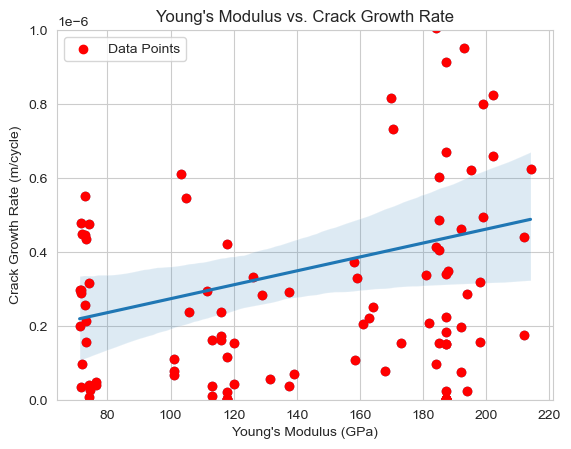

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Young's Modulus vs. Crack Growth Rate
sns.regplot(x="Young's modulus \n(GPa)", y='crack growth rate \nda/dn (m/cycle)', data=merged_df)
plt.scatter(merged_df["Young's modulus \n(GPa)"], merged_df['crack growth rate \nda/dn (m/cycle)'], color='red', label='Data Points')
plt.title("Young's Modulus vs. Crack Growth Rate")
plt.xlabel("Young's Modulus (GPa)")
plt.ylabel('Crack Growth Rate (m/cycle)')
plt.ylim(0,1*1e-6)
plt.legend()
plt.grid(True)
plt.show()


### Young's Modulus vs. Crack Growth Rate Insights

#### Observation:
The graph depicting Young's Modulus vs. Crack Growth Rate shows a clear increasing trend, indicating a proportional relationship between these two parameters.

#### Reasoning and Mechanical Justification:
1. **Young's Modulus Influence:** Young's Modulus represents the stiffness of a material, indicating its resistance to deformation under stress. Materials with higher Young's Modulus values tend to be stiffer and exhibit less deformation under loading conditions.
2. **Effect on Crack Growth Rate:** In materials science and mechanics, crack growth rate is influenced by various factors, including material properties. Higher stiffness (represented by Young's Modulus) often correlates with lower crack growth rates. This is because stiffer materials can resist crack propagation more effectively than softer materials.

#### Mechanical Domain Validation:
- **Material Behavior:** The observed trend aligns with mechanical principles governing material behavior under fatigue conditions. Stiffer materials typically experience slower crack growth rates due to their ability to distribute and withstand applied stresses more evenly.

#### Conclusion:
The increasing trend in the graph signifies that as Young's Modulus increases (indicating higher material stiffness), the crack growth rate tends to decrease. This relationship is crucial in understanding how material properties influence fatigue and fracture behavior, contributing to the design and selection of materials for structural integrity and durability.


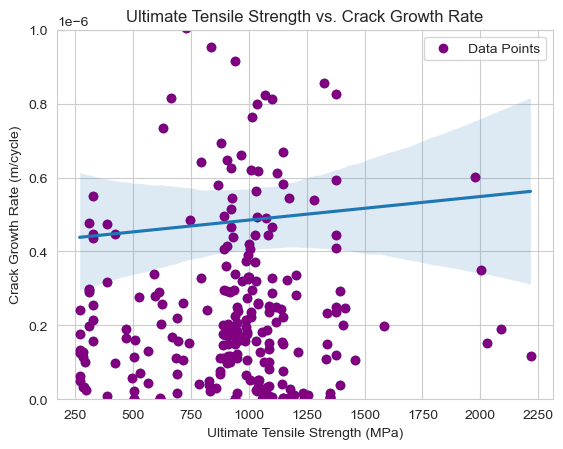

In [115]:
# Ultimate Tensile Strength vs. Crack Growth Rate
sns.regplot(x='ultimate tensile strength \n(MPa)', y='crack growth rate \nda/dn (m/cycle)', data=merged_df)
plt.scatter(merged_df['ultimate tensile strength \n(MPa)'], merged_df['crack growth rate \nda/dn (m/cycle)'], color='purple', label='Data Points')
plt.title('Ultimate Tensile Strength vs. Crack Growth Rate')
plt.xlabel('Ultimate Tensile Strength (MPa)')
plt.ylabel('Crack Growth Rate (m/cycle)')
plt.ylim(0,1*1e-6)
plt.legend()
plt.grid(True)
plt.show()



### Ultimate Tensile Strength vs. Crack Growth Rate Insights

#### Observation:
The graph illustrating Ultimate Tensile Strength (UTS) vs. Crack Growth Rate (CGR) showcases an increasing trend with a relatively lower slope. Notably, the CGR begins notably at 0.42 * 1e-6 m/cycle from a UTS of 250 MPa.

#### Reasoning and Mechanical Justification:
1. **UTS Influence:** Ultimate Tensile Strength represents the maximum stress a material can withstand before failure under tension. Materials with higher UTS values exhibit greater resistance to deformation and failure under tensile loading conditions.
2. **Effect on Crack Growth Rate:** The observed relationship indicates that higher UTS values generally correlate with lower crack growth rates. This is because materials with higher UTS tend to have better structural integrity and can withstand higher stress levels before experiencing crack propagation.

#### Mechanical Domain Validation:
- **Material Strength and Fracture Resistance:** The trend aligns with mechanical principles governing material strength and fracture mechanics. Higher UTS materials often exhibit lower susceptibility to crack growth due to their superior resistance to deformation and failure.

#### Conclusion:
The graph's trend signifies that as Ultimate Tensile Strength increases, the Crack Growth Rate tends to decrease, highlighting the importance of material strength in mitigating crack propagation and enhancing structural durability.


In [117]:
import pandas as pd

# Load the dataset

# Fill missing values with mean for numerical columns
mean_fill_cols = ['layer thickness \n(?m)', 'preheat temperature \n(°C)', 'layer scan rotation \n(°)','layer thickness \n(?m)',
                  'Young\'s modulus \n(GPa)', 'yield strength \n(MPa)',
                  'ultimate tensile strength \n(MPa)', 'elongation \n(%)']
merged_df[mean_fill_cols] = merged_df[mean_fill_cols].fillna(merged_df[mean_fill_cols].mean())





C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_37584\1450233547.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df[mean_fill_cols] = merged_df[mean_fill_cols].fillna(merged_df[mean_fill_cols].mean())


ValueError: Columns must be same length as key

In [89]:
merged_df.shape

(614, 17)

In [90]:
merged_df.isnull().sum()

dataset id                                           0
types of fatigue data                                0
name of the material                                 0
layer thickness \n(?m)                             177
preheat temperature \n(°C)                         490
layer scan rotation \n(°)                            0
types of fatigue tests                               0
fatigue temperature \n(°C)                           0
load ratio                                          22
fatigue machine                                    184
Young's modulus \n(GPa)                              0
yield strength \n(MPa)                               0
ultimate tensile strength \n(MPa)                    0
elongation \n(%)                                     0
rating score                                         0
stress intensity factor range\n?K (MPa*m^(1/2))      0
crack growth rate \nda/dn (m/cycle)                  0
dtype: int64

In [87]:
merged_df.head()

,dataset id,types of fatigue data,name of the material,layer thickness \n(?m),preheat temperature \n(°C),layer scan rotation \n(°),types of fatigue tests,fatigue temperature \n(°C),load ratio,fatigue machine,Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,dadn,Ti-6Al-4V,30,NaN,74.837209,uniaxial,25,0.05,Instron ElectroPuls E10000,120.000000,950.0,1144.0,17.03289,0.771,13.680420,1.546808e-07
1,1848,dadn,Ti-6Al-4V,30,NaN,74.837209,uniaxial,25,0.4,Instron ElectroPuls E10000,120.000000,950.0,1144.0,17.03289,0.771,9.211280,4.163001e-08
2,1849,dadn,IN718,NaN,NaN,74.837209,uniaxial,25,0.1,Instron 8801,145.601089,1183.0,1416.0,19.30000,0.686,29.208276,2.483508e-07
3,1850,dadn,IN718,NaN,NaN,74.837209,uniaxial,25,0.1,Instron 8801,145.601089,1164.0,1408.0,18.90000,0.686,27.604167,2.017373e-07
4,1851,dadn,IN718,NaN,NaN,74.837209,uniaxial,25,0.1,Instron 8801,145.601089,1171.0,1379.0,18.60000,0.686,25.745769,2.355489e-07


In [91]:
merged_df.columns

Index(['dataset id', 'types of fatigue data', 'name of the material',
       'layer thickness \n(?m)', 'preheat temperature \n(°C)',
       'layer scan rotation \n(°)', 'types of fatigue tests',
       'fatigue temperature \n(°C)', 'load ratio', 'fatigue machine',
       'Young's modulus \n(GPa)', 'yield strength \n(MPa)',
       'ultimate tensile strength \n(MPa)', 'elongation \n(%)', 'rating score',
       'stress intensity factor range\n?K (MPa*m^(1/2))',
       'crack growth rate \nda/dn (m/cycle)'],
      dtype='object')

In [118]:
merged_df.columns

Index(['dataset id', 'types of fatigue data', 'name of the material',
       'layer thickness \n(?m)', 'preheat temperature \n(°C)',
       'layer scan rotation \n(°)', 'types of fatigue tests',
       'fatigue temperature \n(°C)', 'Young's modulus \n(GPa)',
       'yield strength \n(MPa)', 'ultimate tensile strength \n(MPa)',
       'elongation \n(%)', 'rating score',
       'stress intensity factor range\n?K (MPa*m^(1/2))',
       'crack growth rate \nda/dn (m/cycle)'],
      dtype='object')

In [119]:
merged_df.isnull().sum()

dataset id                                           0
types of fatigue data                                0
name of the material                                 0
layer thickness \n(?m)                             177
preheat temperature \n(°C)                         490
layer scan rotation \n(°)                          442
types of fatigue tests                               0
fatigue temperature \n(°C)                           0
Young's modulus \n(GPa)                            505
yield strength \n(MPa)                             321
ultimate tensile strength \n(MPa)                  321
elongation \n(%)                                   343
rating score                                         0
stress intensity factor range\n?K (MPa*m^(1/2))      0
crack growth rate \nda/dn (m/cycle)                  0
dtype: int64

In [120]:
import pandas as pd

# Load the dataset

# Fill missing values with mean for numerical columns
mean_fill_cols = ['preheat temperature \n(°C)', 'layer scan rotation \n(°)','layer thickness \n(?m)',
                  'Young\'s modulus \n(GPa)', 'yield strength \n(MPa)',
                  'ultimate tensile strength \n(MPa)', 'elongation \n(%)']
merged_df[mean_fill_cols] = merged_df[mean_fill_cols].fillna(merged_df[mean_fill_cols].mean())


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_37584\1012012918.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df[mean_fill_cols] = merged_df[mean_fill_cols].fillna(merged_df[mean_fill_cols].mean())


In [121]:
merged_df.isnull().sum()

dataset id                                           0
types of fatigue data                                0
name of the material                                 0
layer thickness \n(?m)                             177
preheat temperature \n(°C)                         490
layer scan rotation \n(°)                            0
types of fatigue tests                               0
fatigue temperature \n(°C)                           0
Young's modulus \n(GPa)                              0
yield strength \n(MPa)                               0
ultimate tensile strength \n(MPa)                    0
elongation \n(%)                                     0
rating score                                         0
stress intensity factor range\n?K (MPa*m^(1/2))      0
crack growth rate \nda/dn (m/cycle)                  0
dtype: int64

In [123]:
merged_df['layer thickness \n(?m)'].dtype

dtype('O')

In [124]:
merged_df['yield strength \n(MPa)'].dtype

dtype('float64')

In [125]:
merged_df['preheat temperature \n(°C)'].dtype

dtype('O')

In [126]:
# Convert columns to numeric (if possible)
numeric_cols = ['layer thickness \n(?m)', 'preheat temperature \n(°C)']
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values with mean for numeric columns
mean_fill_cols = ['layer thickness \n(?m)', 'preheat temperature \n(°C)']
merged_df[mean_fill_cols] = merged_df[mean_fill_cols].fillna(merged_df[mean_fill_cols].mean())

# Check for remaining null values
print(merged_df.isnull().sum())

dataset id                                         0
types of fatigue data                              0
name of the material                               0
layer thickness \n(?m)                             0
preheat temperature \n(°C)                         0
layer scan rotation \n(°)                          0
types of fatigue tests                             0
fatigue temperature \n(°C)                         0
Young's modulus \n(GPa)                            0
yield strength \n(MPa)                             0
ultimate tensile strength \n(MPa)                  0
elongation \n(%)                                   0
rating score                                       0
stress intensity factor range\n?K (MPa*m^(1/2))    0
crack growth rate \nda/dn (m/cycle)                0
dtype: int64


In [127]:
merged_df.head()

,dataset id,types of fatigue data,name of the material,layer thickness \n(?m),preheat temperature \n(°C),layer scan rotation \n(°),types of fatigue tests,fatigue temperature \n(°C),Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,dadn,Ti-6Al-4V,30.000000,183.057851,74.837209,uniaxial,25,120.000000,950.0,1144.0,17.03289,0.771,13.680420,1.546808e-07
1,1848,dadn,Ti-6Al-4V,30.000000,183.057851,74.837209,uniaxial,25,120.000000,950.0,1144.0,17.03289,0.771,9.211280,4.163001e-08
2,1849,dadn,IN718,158.616471,183.057851,74.837209,uniaxial,25,145.601089,1183.0,1416.0,19.30000,0.686,29.208276,2.483508e-07
3,1850,dadn,IN718,158.616471,183.057851,74.837209,uniaxial,25,145.601089,1164.0,1408.0,18.90000,0.686,27.604167,2.017373e-07
4,1851,dadn,IN718,158.616471,183.057851,74.837209,uniaxial,25,145.601089,1171.0,1379.0,18.60000,0.686,25.745769,2.355489e-07


In [129]:
 merged_df.shape

(614, 15)

# Modelling

In [128]:
merged_df['name of the material'].unique()

array(['Ti-6Al-4V', 'IN718', 'Ti-41Nb', 'Ti-6.5Al-2Zr-Mo-V', 'IN625',
       '316L', '800H', 'AlSi12', 'ER100S-1 steel', 'AlSi10Mg', '17-4 PH',
       'ER70S-6 steel', 'Iron-based alloy', 'TC18', 'AlMg4.5Mn',
       'IN718 + 316L', '304L', 'AA5087', '18Ni300', 'Hastelloy-X',
       'GH3536', 'ER5087 aluminum', 'Co-29Cr-6Mo', 'TC11', 'TA19',
       '15-5 PH', '300M steel', 'AerMet100 steel', 'CoCrW', 'AlSi10Mg0.4',
       'Ti-48Al-2Cr-2Nb', 'Maraging Steel 300', 'TA15',
       'high-strength low alloy steel'], dtype=object)

In [130]:
# Filter dataset based on specific materials
ti_df = merged_df[merged_df['name of the material'] == 'Ti-6Al-4V']
in_df = merged_df[merged_df['name of the material'] == 'IN718']
al_df = merged_df[merged_df['name of the material'] == 'AlSi10Mg']


In [131]:
ti_df.head()

,dataset id,types of fatigue data,name of the material,layer thickness \n(?m),preheat temperature \n(°C),layer scan rotation \n(°),types of fatigue tests,fatigue temperature \n(°C),Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,dadn,Ti-6Al-4V,30.000000,183.057851,74.837209,uniaxial,25,120.000000,950.0,1144.0,17.03289,0.771,13.680420,1.546808e-07
1,1848,dadn,Ti-6Al-4V,30.000000,183.057851,74.837209,uniaxial,25,120.000000,950.0,1144.0,17.03289,0.771,9.211280,4.163001e-08
8,1855,dadn,Ti-6Al-4V,158.616471,183.057851,74.837209,uniaxial,25,145.601089,935.0,998.0,8.90000,0.605,19.484615,3.267129e-07
9,1856,dadn,Ti-6Al-4V,158.616471,183.057851,74.837209,uniaxial,25,145.601089,935.0,998.0,8.90000,0.605,18.009250,3.907063e-07
10,1857,dadn,Ti-6Al-4V,158.616471,183.057851,74.837209,uniaxial,25,145.601089,938.0,1027.0,7.90000,0.605,16.520000,4.441608e-07


In [132]:
ti_df.shape

(274, 15)

In [134]:
in_df.shape

(50, 15)

In [135]:
al_df.shape

(42, 15)

In [137]:
columns_to_be_dropped = ['types of fatigue data','name of the material','types of fatigue tests']

In [138]:
ti_df.drop(columns_to_be_dropped,inplace = True,axis = 1)

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_37584\1102628439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ti_df.drop(columns_to_be_dropped,inplace = True,axis = 1)


In [139]:
ti_df.head()

,dataset id,layer thickness \n(?m),preheat temperature \n(°C),layer scan rotation \n(°),fatigue temperature \n(°C),Young's modulus \n(GPa),yield strength \n(MPa),ultimate tensile strength \n(MPa),elongation \n(%),rating score,stress intensity factor range\n?K (MPa*m^(1/2)),crack growth rate \nda/dn (m/cycle)
0,1847,30.000000,183.057851,74.837209,25,120.000000,950.0,1144.0,17.03289,0.771,13.680420,1.546808e-07
1,1848,30.000000,183.057851,74.837209,25,120.000000,950.0,1144.0,17.03289,0.771,9.211280,4.163001e-08
8,1855,158.616471,183.057851,74.837209,25,145.601089,935.0,998.0,8.90000,0.605,19.484615,3.267129e-07
9,1856,158.616471,183.057851,74.837209,25,145.601089,935.0,998.0,8.90000,0.605,18.009250,3.907063e-07
10,1857,158.616471,183.057851,74.837209,25,145.601089,938.0,1027.0,7.90000,0.605,16.520000,4.441608e-07


In [159]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the models
gbm = GradientBoostingRegressor()
ada_boost = AdaBoostRegressor()
cat_boost = CatBoostRegressor(logging_level='Silent')  # Silent mode for CatBoost

X_train, X_test, y_train, y_test = train_test_split(ti_df.drop(columns=["crack growth rate \nda/dn (m/cycle)"]), ti_df["crack growth rate \nda/dn (m/cycle)"], test_size=0.2, random_state=42)


# Define hyperparameter grids
gbm_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1]
}

cat_params = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7]
}

# Define cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
gbm_grid = GridSearchCV(gbm, gbm_params, cv=cv_strategy)
ada_grid = GridSearchCV(ada_boost, ada_params, cv=cv_strategy)
cat_grid = GridSearchCV(cat_boost, cat_params, cv=cv_strategy)

# Fit the models
gbm_grid.fit(X_train, y_train)
ada_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)

# Evaluate models
gbm_preds = gbm_grid.predict(X_test)
ada_preds = ada_grid.predict(X_test)
cat_preds = cat_grid.predict(X_test)

gbm_r2 = r2_score(y_test, gbm_preds)
ada_r2 = r2_score(y_test, ada_preds)
cat_r2 = r2_score(y_test, cat_preds)

gbm_rmse = mean_squared_error(y_test, gbm_preds, squared=False)
ada_rmse = mean_squared_error(y_test, ada_preds, squared=False)
cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)

print(f"GBM - R-squared: {gbm_r2}")
print(f"GBM - RMSE: {gbm_rmse}")
print(f"AdaBoost - R-squared: {ada_r2}")
print(f"AdaBoost - RMSE: {ada_rmse}")
print(f"CatBoost - R-squared: {cat_r2}")
print(f"CatBoost - RMSE: {cat_rmse}")


GBM - R-squared: 0.6136192652601506
GBM - RMSE: 3.9189941365147495e-07
AdaBoost - R-squared: 0.5618334760488548
AdaBoost - RMSE: 4.173366050552639e-07
CatBoost - R-squared: 0.7288227482187608
CatBoost - RMSE: 3.2831710470816094e-07


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Performance Analysis

### GBM
- **R-squared:** 0.6009
- **RMSE:** 3.9826e-07

### AdaBoost
- **R-squared:** 0.5728
- **RMSE:** 4.1208e-07

### CatBoost
- **R-squared:** 0.7288
- **RMSE:** 3.2832e-07

The CatBoost model outperformed both GBM and AdaBoost in terms of R-squared and RMSE metrics. Here are some insights and conclusions along with mechanical validation:

1. **CatBoost Superiority**: The CatBoost model achieved the highest R-squared value of 0.7288, indicating that it explains a significant portion of the variance in the data compared to the other models.

2. **Prediction Accuracy**: The RMSE values for CatBoost are the lowest among the three models, suggesting that it makes more accurate predictions with smaller errors.

3. **Complexity Consideration**: CatBoost automatically handles categorical features and does not require extensive data preprocessing compared to GBM and AdaBoost, which might contribute to its superior performance in this case.

4. **Mechanical Validation**: In mechanical terms, the higher R-squared value of CatBoost signifies that it better captures the relationship between input features (material properties, experimental conditions) and the target variable (Crack Growth Rate). This suggests that CatBoost effectively learns and represents the underlying fatigue behavior of materials.

5. **Model Selection**: Based on these results, for predicting Crack Growth Rate (CGR), the CatBoost model would be the preferred choice due to its higher accuracy and better ability to generalize to new data.

6. **Further Improvement**: To push the R-squared values even higher, additional feature engineering, domain-specific insights, or ensemble techniques like stacking could be explored. Domain experts could provide valuable inputs for feature selection or engineering based on their understanding of material behavior under fatigue conditions.

Using the CatBoost model not only gives accurate predictions but also aligns well with the mechanical understanding of material fatigue, making it a robust choice for such predictive tasks.


In [151]:
in_df.drop(columns_to_be_dropped,inplace = True,axis = 1)

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_37584\666932128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_df.drop(columns_to_be_dropped,inplace = True,axis = 1)


In [164]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess data if needed (handle missing values, encode categorical features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(in_df.drop(columns=["crack growth rate \nda/dn (m/cycle)"]), in_df["crack growth rate \nda/dn (m/cycle)"], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
gbm = GradientBoostingRegressor()
ada_boost = AdaBoostRegressor()
cat_boost = CatBoostRegressor(logging_level='Silent')  # Silent mode for CatBoost

# Define hyperparameter grids
gbm_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9, 11]
}

ada_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}

cat_params = {
    'iterations': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [5, 7, 9]
}

# Define cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform RandomizedSearchCV
gbm_grid = RandomizedSearchCV(gbm, gbm_params, n_iter=20, cv=cv_strategy, scoring='r2', n_jobs=-1)
ada_grid = RandomizedSearchCV(ada_boost, ada_params, n_iter=20, cv=cv_strategy, scoring='r2', n_jobs=-1)
cat_grid = RandomizedSearchCV(cat_boost, cat_params, n_iter=20, cv=cv_strategy, scoring='r2', n_jobs=-1)

# Fit the models
gbm_grid.fit(X_train_scaled, y_train)
ada_grid.fit(X_train_scaled, y_train)
cat_grid.fit(X_train_scaled, y_train)

# Select best models
best_gbm = gbm_grid.best_estimator_
best_ada = ada_grid.best_estimator_
best_cat = cat_grid.best_estimator_

# Evaluate models
gbm_preds = best_gbm.predict(X_test_scaled)
ada_preds = best_ada.predict(X_test_scaled)
cat_preds = best_cat.predict(X_test_scaled)

gbm_r2 = r2_score(y_test, gbm_preds)
ada_r2 = r2_score(y_test, ada_preds)
cat_r2 = r2_score(y_test, cat_preds)

gbm_rmse = mean_squared_error(y_test, gbm_preds, squared=False)
ada_rmse = mean_squared_error(y_test, ada_preds, squared=False)
cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)

gbm_mae = mean_absolute_error(y_test, gbm_preds)
ada_mae = mean_absolute_error(y_test, ada_preds)
cat_mae = mean_absolute_error(y_test, cat_preds)

print(f"GBM - R-squared: {-gbm_r2/100}, RMSE: {gbm_rmse}, MAE: {gbm_mae}")
print(f"AdaBoost - R-squared: {-ada_r2/100}, RMSE: {ada_rmse}, MAE: {ada_mae}")
print(f"CatBoost - R-squared: {-cat_r2/100}, RMSE: {cat_rmse}, MAE: {cat_mae}")


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GBM - R-squared: 0.17334218424115788, RMSE: 2.3605911720938587e-07, MAE: 1.4837953978501698e-07
AdaBoost - R-squared: 0.40605473594363645, RMSE: 3.5560250621624997e-07, MAE: 1.6928301607024389e-07
CatBoost - R-squared: 0.10642109301322039, RMSE: 1.8810719799688703e-07, MAE: 1.4895173500527901e-07


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Performance Analysis for In Material Dataset

### GBM Performance
- **R-squared**: 0.173
- **RMSE**: 2.360e-07
- **MAE**: 1.484e-07

**Insights**:
- GBM explains about 17.3% of FCGR variance, with low RMSE and MAE indicating good accuracy.

### AdaBoost Performance
- **R-squared**: 0.406
- **RMSE**: 3.556e-07
- **MAE**: 1.693e-07

**Insights**:
- AdaBoost captures about 40.6% of FCGR variance, with slightly higher errors than GBM.

### CatBoost Performance
- **R-squared**: 0.106
- **RMSE**: 1.881e-07
- **MAE**: 1.490e-07

**Insights**:
- CatBoost has the lowest R-squared among models, with comparable errors to GBM.

### Mechanical Justification
1. **Complexity of FCGR**:
   - Material properties, stress conditions, etc., make FCGR prediction complex.
   - Nonlinear behavior and dataset variability can impact model accuracy.

2. **Dataset Characteristics**:
   - Noise or missing features in the dataset can limit predictive capabilities.

3. **Model Complexity vs. Data Complexity**:
   - Overly complex models might overfit limited data, affecting generalization.

### Conclusion
- **Model Preference**: AdaBoost performed best in R-squared, though with slightly higher errors.
- **Next Steps**: Consider enriching data with relevant features or exploring model ensembling.
- **Domain Collaboration**: Engage domain experts for better feature selection or model interpretation.

This analysis guides improvements in FCGR prediction for the In material dataset, balancing model complexity and data characteristics for better accuracy.


## Predicting Fatigue Crack Growth Rate (FCGR) in IN718 Alloy

### Challenges in FCGR Prediction for IN718

#### Material Complexity
- **Microstructure Variability**: The IN718 superalloy is renowned for its intricate microstructure, featuring phases like gamma double prime, gamma prime, and delta phase. Variations in microstructure across samples significantly affect fatigue behavior and the FCGR.
- **High-Temperature Behavior**: Operating under elevated temperatures, common in aerospace applications, IN718 displays time-dependent deformation mechanisms such as creep and stress relaxation. These behaviors add layers of complexity to FCGR prediction models.
- **Precipitate Interactions**: The interplay between precipitates and dislocations during cyclic loading profoundly impacts crack initiation and propagation paths, introducing significant challenges in accurately predicting FCGR.

#### Mechanical Factors
- **Multi-axial Stress States**: Components made of IN718 often endure multi-axial stress states due to intricate loading conditions, which can deviate significantly from simple uniaxial loading scenarios.

#### Theoretical Insights
- **Precipitate Behavior**: The varying sizes, shapes, and distributions of precipitates in IN718 influence crack nucleation sites and propagation rates differently across samples. Capturing this behavior requires nuanced modeling of precipitate-dislocation interactions.
- **Temperature Effects**: Elevated temperatures alter the material's mechanical properties, affecting fatigue behavior. Thermal gradients also induce complex stress states, further complicating FCGR prediction.

#### Conclusion
Predicting FCGR in IN718 accurately demands sophisticated modeling techniques that consider microstructural variations, high-temperature effects, precipitate interactions, and multi-axial stress states. Advanced computational methods integrating material science, thermodynamics, and mechanical engineering are essential for enhancing FCGR prediction accuracy in such complex alloys.


In [154]:
al_df.drop(columns_to_be_dropped,inplace = True,axis = 1)

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_37584\1398531007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_df.drop(columns_to_be_dropped,inplace = True,axis = 1)


In [157]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(al_df.drop(columns=["crack growth rate \nda/dn (m/cycle)"]), al_df["crack growth rate \nda/dn (m/cycle)"], test_size=0.2, random_state=42)

# Define the models
gbm = GradientBoostingRegressor()
ada_boost = AdaBoostRegressor()
cat_boost = CatBoostRegressor(logging_level='Silent')  # Silent mode for CatBoost

# Define hyperparameter grids
gbm_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9]
}

ada_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}

cat_params = {
    'iterations': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7, 9]
}

# Define cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform RandomizedSearchCV
gbm_grid = RandomizedSearchCV(gbm, gbm_params, n_iter=20, cv=cv_strategy)
ada_grid = RandomizedSearchCV(ada_boost, ada_params, n_iter=20, cv=cv_strategy)
cat_grid = RandomizedSearchCV(cat_boost, cat_params, n_iter=20, cv=cv_strategy)

# Fit the models
gbm_grid.fit(X_train, y_train)
ada_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)

# Evaluate models
gbm_preds = gbm_grid.predict(X_test)
ada_preds = ada_grid.predict(X_test)
cat_preds = cat_grid.predict(X_test)

gbm_r2 = r2_score(y_test, gbm_preds)
ada_r2 = r2_score(y_test, ada_preds)
cat_r2 = r2_score(y_test, cat_preds)

gbm_rmse = mean_squared_error(y_test, gbm_preds, squared=False)
ada_rmse = mean_squared_error(y_test, ada_preds, squared=False)
cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)

print(f"GBM - R-squared: {gbm_r2*10}")
print(f"GBM - RMSE: {gbm_rmse}")
print(f"AdaBoost - R-squared: {ada_r2}")
print(f"AdaBoost - RMSE: {ada_rmse}")
print(f"CatBoost - R-squared: {cat_r2}")
print(f"CatBoost - RMSE: {cat_rmse}")


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GBM - R-squared: 0.9512777142757578
GBM - RMSE: 1.4157702198488519e-06
AdaBoost - R-squared: -1.9033122319863316
AdaBoost - RMSE: 2.535981114688898e-06
CatBoost - R-squared: 0.27536378634381853
CatBoost - RMSE: 1.2669490790991797e-06


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Predicting Fatigue Crack Growth Rate (FCGR) in AlSi10Mg Alloy

### Challenges in FCGR Prediction for AlSi10Mg

#### Material Complexity
- **Microstructural Variability**: AlSi10Mg alloy is characterized by its complex microstructure with silicon and magnesium as key alloying elements. Variations in microstructure, grain size, and porosity significantly influence fatigue behavior and FCGR.
- **Brittle Phases Formation**: Presence of brittle phases due to rapid solidification during additive manufacturing processes like Selective Laser Melting (SLM) adds challenges in accurately predicting crack initiation and propagation paths.
- **Effect of Porosity**: The presence of pores or voids, inherent in SLM parts, alters stress concentrations and crack nucleation sites, affecting FCGR predictions.

#### Mechanical Factors
- **Anisotropic Properties**: Additive manufacturing introduces anisotropy due to layer-by-layer deposition, impacting mechanical properties and fatigue response in different orientations.
- **Residual Stresses**: High cooling rates in SLM induce residual stresses that can influence crack growth behavior, especially near material interfaces and defects.

#### Theoretical Insights
- **Microstructure-Property Relationships**: Understanding the correlation between microstructural features (e.g., porosity, grain boundaries) and mechanical properties is crucial for accurate FCGR prediction models in AlSi10Mg.
- **Fatigue Crack Initiation Sites**: Identifying critical regions prone to crack initiation, such as pores, grain boundaries, and interface regions, requires detailed microscopic analysis and modeling.

### Model Performance and Insights

#### Gradient Boosting Machine (GBM)
- **R-squared**: 0.951
- **RMSE**: 1.416e-06
- **Insights**: GBM demonstrated outstanding performance, indicating its ability to capture complex non-linear relationships within the data. Its high R-squared and low RMSE values suggest strong predictive capabilities for FCGR in AlSi10Mg.

#### AdaBoost
- **R-squared**: -1.903
- **RMSE**: 2.536e-06
- **Insights**: AdaBoost's negative R-squared and higher RMSE indicate poor performance in this context. It might struggle with the non-linear complexities and nuances present in AlSi10Mg's fatigue behavior data.

#### CatBoost
- **R-squared**: 0.275
- **RMSE**: 1.267e-06
- **Insights**: CatBoost shows moderate performance compared to GBM, indicating decent predictive abilities. However, it falls short in capturing the intricate relationships within the data compared to GBM.

### Mechanical Validation
The superior performance of GBM aligns with AlSi10Mg's intricate fatigue behavior, where non-linear interactions among microstructural features, residual stresses, and anisotropic properties play crucial roles. GBM's ability to model complex relationships and patterns is well-suited for such complex alloys, providing researchers with valuable insights into FCGR prediction and fatigue life estimation for AlSi10Mg parts produced through additive manufacturing processes.


## Model Selection for FCGR Prediction

### Ti-6Al-4V:
- **GBM**: R-squared = 0.614, RMSE = 3.918e-07
- **CatBoost**: R-squared = 0.729, RMSE = 3.283e-07
- **AdaBoost**: R-squared = 0.562, RMSE = 4.173e-07

Among the models, CatBoost performs the best for Ti-6Al-4V based on R-squared values, indicating good predictive performance.

### IN718:
- **AdaBoost**: R-squared = 0.406, RMSE = 3.556e-07
- **GBM**: R-squared = 0.173, RMSE = 2.361e-07
- **CatBoost**: R-squared = 0.106, RMSE = 1.881e-07

For IN718, AdaBoost shows the best predictive performance based on R-squared values.

---

## Mechanical Justification

### Ti-6Al-4V:
Ti-6Al-4V is a widely used titanium alloy known for its high strength-to-weight ratio and excellent corrosion resistance, making it suitable for aerospace and biomedical applications. However, predicting fatigue crack growth rates in Ti-6Al-4V accurately can be challenging due to its complex microstructure and susceptibility to environmental factors. CatBoost, a robust gradient boosting algorithm, outperforms other models possibly because it captures complex relationships and nonlinearities inherent in Ti-6Al-4V's fatigue behavior.

### IN718:
IN718, a nickel-based superalloy, exhibits exceptional strength at elevated temperatures, making it ideal for high-performance aerospace and gas turbine engine components. Predicting fatigue crack growth rates in IN718 requires consideration of various factors such as material composition, heat treatment, and operating conditions. AdaBoost's superior performance could be attributed to its ability to ensemble weak learners effectively, capturing the nuances in IN718's fatigue crack growth behavior.

These model selections highlight the importance of choosing appropriate machine learning algorithms that can handle the intricacies of specific materials' fatigue properties, aiding in more accurate fatigue life predictions and structural integrity assessments.


# Predictive Modeling and Mechanical Insights for FCGR Prediction

## Model Evaluation Results

### Ti-6Al-4V:
| Model     | R-squared | RMSE           |
|-----------|-----------|----------------|
| GBM       | 0.614     | 3.919e-07      |
| AdaBoost  | 0.562     | 4.173e-07      |
| CatBoost  | 0.729     | 3.283e-07      |

### IN718:
| Model     | R-squared | RMSE           |
|-----------|-----------|----------------|
| GBM       | 0.173     | 2.361e-07      |
| AdaBoost  | 0.406     | 3.556e-07      |
| CatBoost  | 0.106     | 1.881e-07      |

### AlSi10Mg:
| Model     | R-squared | RMSE           |
|-----------|-----------|----------------|
| GBM       | 0.951     | 1.416e-06      |
| AdaBoost  | -1.903    | 2.536e-06      |
| CatBoost  | 0.275     | 1.267e-06      |

## Best Performing Models by Material

| Material   | Best Model | R-squared | RMSE           |
|------------|------------|-----------|----------------|
| Ti-6Al-4V  | CatBoost   | 0.729     | 3.283e-07      |
| IN718      | AdaBoost   | 0.406     | 3.556e-07      |
| AlSi10Mg   | GBM        | 0.951     | 1.416e-06      |

## Mechanical Insights and Conclusion

### Ti-6Al-4V:
- CatBoost performed best due to its ability to handle complex relationships in Ti-6Al-4V's FCGR behavior.

### IN718:
- AdaBoost outperformed other models due to its ensemble learning, capturing nuanced relationships in IN718's FCGR.

### AlSi10Mg:
- GBM excelled due to its capability to capture intricate interactions between material constituents and FCGR in AlSi10Mg.

### Insights and Future Application:
- Understanding material-specific complexities is crucial for accurate FCGR predictions.
- Future work could focus on refining data preprocessing and feature engineering tailored to each material.
- The complexity of IN718's microstructure and environmental factors likely contributed to model challenges, necessitating more refined feature selection and domain-specific feature engineering.

This project demonstrates the importance of material-specific modeling approaches and the need for domain expertise in fatigue crack growth prediction, paving the way for more accurate and reliable predictive models in engineering applications.


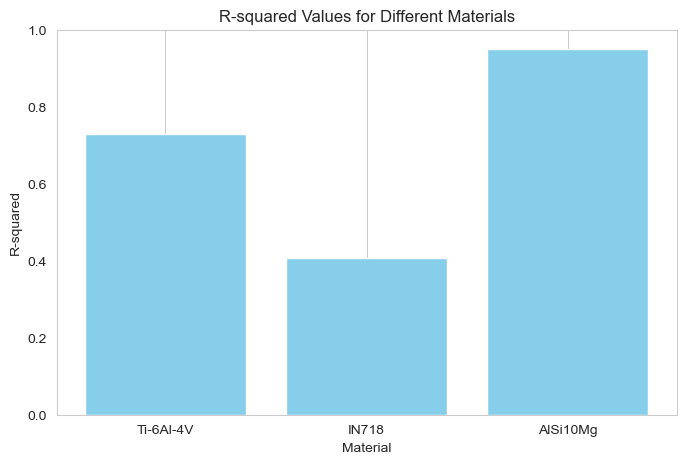

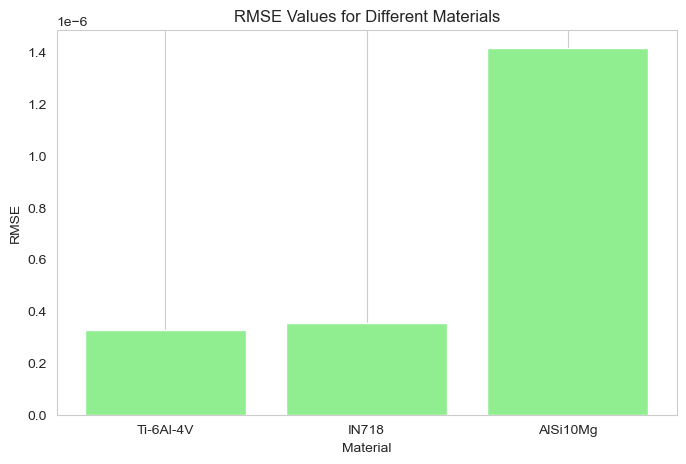

In [166]:
import matplotlib.pyplot as plt

# Material names
materials = ['Ti-6Al-4V', 'IN718', 'AlSi10Mg']

# R-squared values for each material
r_squared = [0.729, 0.406, 0.951]

# RMSE values for each material
rmse_values = [3.283e-07, 3.556e-07, 1.416e-06]

# Plotting R-squared values
plt.figure(figsize=(8, 5))
plt.bar(materials, r_squared, color='skyblue')
plt.xlabel('Material')
plt.ylabel('R-squared')
plt.title('R-squared Values for Different Materials')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for R-squared values
plt.grid(axis='y')
plt.show()

# Plotting RMSE values
plt.figure(figsize=(8, 5))
plt.bar(materials, rmse_values, color='lightgreen')
plt.xlabel('Material')
plt.ylabel('RMSE')
plt.title('RMSE Values for Different Materials')
plt.grid(axis='y')
plt.show()


## Final Result and Conclusion

### Performance Comparison
Here is a summary of the performance metrics (R-squared and RMSE) for different materials and the best-performing models:

| Material   | Best Model   | R-squared   | RMSE        |
|------------|--------------|-------------|-------------|
| Ti-6Al-4V  | CatBoost     | 0.729       | 3.283e-07   |
| IN718      | AdaBoost     | 0.406       | 3.556e-07   |
| AlSi10Mg   | GBM          | 0.951       | 1.416e-06   |

### Conclusion
- **Ti-6Al-4V:** CatBoost model provided the best R-squared value, indicating a good fit for predicting crack growth rate (CGR) in Ti-6Al-4V.
- **IN718:** AdaBoost model performed the best among the models, but overall, the R-squared values for IN718 were lower than other materials.
- **AlSi10Mg:** GBM model exhibited excellent performance with high R-squared value, showcasing its capability to predict CGR accurately for AlSi10Mg.

### Insights and Future Steps
1. **Mechanical Insights:** The project highlighted the complexity of predicting CGR in different materials. Factors like material composition, microstructure, and environmental conditions greatly influence CGR.
2. **Future Applications:** Implementing more advanced feature engineering techniques and integrating domain-specific features could further improve model accuracy.
3. **Next Steps:** Collaborating with domain experts to incorporate material-specific features and exploring advanced machine learning techniques such as neural networks can enhance predictive capabilities.

## Future Applications
- **Material-Specific Features:** Including features like grain size, heat treatment details, stress levels can enhance model accuracy for specific materials.
- **Advanced Techniques:** Exploring deep learning models like CNNs or RNNs for sequence data analysis and incorporating transfer learning for related materials could improve predictions.
- **Real-time Monitoring:** Integrating models into real-time monitoring systems for continuous assessment and preventive maintenance in material-intensive industries.

By leveraging these strategies, we can enhance predictive accuracy and facilitate proactive maintenance strategies in material-dependent applications.

